In [1]:
!export NUMBA_ENABLE_CUDASIM=1


In [1]:
#export NUMBA_ENABLE_CUDASIM=1 && /Users/akunas/anaconda/envs/py35/bin/jupyter_mac.command

SyntaxError: invalid syntax (<ipython-input-1-c60a070405d9>, line 1)

In [2]:
from __future__ import division
from numba import cuda
import numpy
import math

# CUDA kernel
@cuda.jit
def my_kernel(io_array):
    pos = cuda.grid(1)
    if pos < io_array.size:
        io_array[pos] *= 2 # do the computation

# Host code   
data = numpy.ones(256)
threadsperblock = 256
blockspergrid = math.ceil(data.shape[0] / threadsperblock)
my_kernel[blockspergrid, threadsperblock](data)
print(data)

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2

In [5]:
from __future__ import division
from numba import cuda
import numpy
import math

@cuda.jit
def my_kernel_2D(io_array):
    x, y = cuda.grid(2)
    if x < io_array.shape[0] and y < io_array.shape[1]:
        io_array[x,y] *= 2
 
data = numpy.ones((16, 16))
threadsperblock = (16, 16)
blockspergrid_x = math.ceil(data.shape[0] / threadsperblock[0])
blockspergrid_y = math.ceil(data.shape[1] / threadsperblock[1])
blockspergrid = (blockspergrid_x, blockspergrid_y)
my_kernel_2D[blockspergrid, threadsperblock](data)
print(data)

[[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 

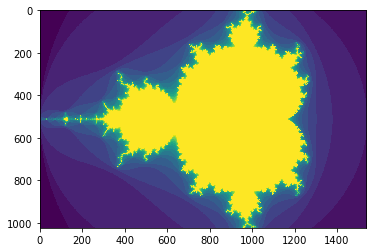

In [9]:
#
# Simple Python program to calculate elements in the Mandelbrot set.
#
import numpy as np
from pylab import imshow, show

def mandel(x, y, max_iters):
    '''
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the 
    Mandelbrot set given a fixed number of iterations.
    '''
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i
            
    return max_iters
    
def compute_mandel(min_x, max_x, min_y, max_y, image, iters):
    '''
    Calculate the mandel value for each element in the 
    image array. The real and imag variables contain a 
    value for each element of the complex space defined 
    by the X and Y boundaries (min_x, max_x) and 
    (min_y, max_y).
    '''
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height

    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            image[y, x] = mandel(real, imag, iters)

if __name__ == '__main__':
	image = np.zeros((1024, 1536), dtype = np.uint8)
	compute_mandel(-2.0, 1.0, -1.0, 1.0, image, 20) 
	imshow(image)
	show()

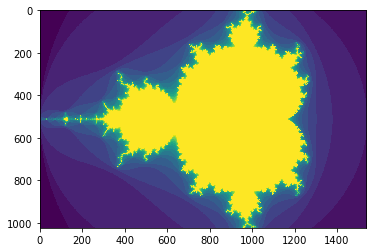

In [29]:
# 
# A CUDA version to calculate the Mandelbrot set
#
from numba import cuda
import numpy as np
from pylab import imshow, show

@cuda.jit(device=True)
def mandel(x, y, max_iters):
    '''
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the 
    Mandelbrot set given a fixed number of iterations.
    '''
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return max_iters

@cuda.jit
def compute_mandel(min_x, max_x, min_y, max_y, image, iters):
    '''
    This function is called once per block.  Then I manually iterate threads.
    Because the blockdimy*griddimy != 1536, each block (and each thread within each block)
    will be responsible for more than one cell
    '''
    start_row, start_col = cuda.grid(2)
    
    # Thread id in a 1D block
    tx, ty = cuda.threadIdx.x, cuda.threadIdx.y
    # Block id in a 1D grid
    bx, by = cuda.blockIdx.x, cuda.blockIdx.y
    # Block width, i.e. number of threads per block
    bw, bh = cuda.blockDim.x, cuda.blockDim.y
    # Grid width
    gw, gh = cuda.gridDim.x, cuda.gridDim.y

    # Compute flattened index inside the array    

    height = image.shape[0]
    width = image.shape[1]
    
    # Each row is divided into 32 blocks of 32 threads
    # Each column is divided into 16 blocks of 8 threads
    
    cols_per_thread = math.ceil( width  / (gw * bw) )
    rows_per_thread = math.ceil( height / (gh * bh) )
    
    min_col = (bx * bw + tx) * cols_per_thread
    min_row = (by * bh + ty) * rows_per_thread

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height

    for x in range(min_col, min_col + cols_per_thread):
        real = min_x + x * pixel_size_x
        for y in range(min_row, min_row + rows_per_thread):
            imag = min_y + y * pixel_size_y
            if y < image.shape[0] and x < image.shape[1]:
                image[y, x] = mandel(real, imag, iters)

    ### YOUR CODE HERE
    
if __name__ == '__main__':
    image = np.zeros((1024, 1536), dtype = np.uint8)
    blockdim = (32, 8)
    griddim = (32, 16)

    image_global_mem = cuda.to_device(image)
    compute_mandel[griddim, blockdim](-2.0, 1.0, -1.0, 1.0, image_global_mem, 20) 
    image_global_mem.copy_to_host()
    imshow(image)
    show()


In [31]:
%%file mandelbrot_gpu.py

# 
# A CUDA version to calculate the Mandelbrot set
#
from numba import cuda
import numpy as np
from pylab import imshow, show

@cuda.jit(device=True)
def mandel(x, y, max_iters):
    '''
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the 
    Mandelbrot set given a fixed number of iterations.
    '''
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return max_iters

@cuda.jit
def compute_mandel(min_x, max_x, min_y, max_y, image, iters):
    '''
    This function is called once per block.  Then I manually iterate threads.
    Because the blockdimy*griddimy != 1536, each block (and each thread within each block)
    will be responsible for more than one cell
    '''
    start_row, start_col = cuda.grid(2)
    
    # Thread id in a 1D block
    tx, ty = cuda.threadIdx.x, cuda.threadIdx.y
    # Block id in a 1D grid
    bx, by = cuda.blockIdx.x, cuda.blockIdx.y
    # Block width, i.e. number of threads per block
    bw, bh = cuda.blockDim.x, cuda.blockDim.y
    # Grid width
    gw, gh = cuda.gridDim.x, cuda.gridDim.y

    # Compute flattened index inside the array    

    height = image.shape[0]
    width = image.shape[1]
    
    # Each row is divided into 32 blocks of 32 threads
    # Each column is divided into 16 blocks of 8 threads
    
    cols_per_thread = math.ceil( width  / (gw * bw) )
    rows_per_thread = math.ceil( height / (gh * bh) )
    
    min_col = (bx * bw + tx) * cols_per_thread
    min_row = (by * bh + ty) * rows_per_thread

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height

    for x in range(min_col, min_col + cols_per_thread):
        real = min_x + x * pixel_size_x
        for y in range(min_row, min_row + rows_per_thread):
            imag = min_y + y * pixel_size_y
            if y < image.shape[0] and x < image.shape[1]:
                image[y, x] = mandel(real, imag, iters)

    ### YOUR CODE HERE
    
if __name__ == '__main__':
    image = np.zeros((1024, 1536), dtype = np.uint8)
    blockdim = (32, 8)
    griddim = (32, 16)

    image_global_mem = cuda.to_device(image)
    compute_mandel[griddim, blockdim](-2.0, 1.0, -1.0, 1.0, image_global_mem, 20) 
    image_global_mem.copy_to_host()
    imshow(image)
    show()


Writing mandelbrot_gpu.py
